<a href="https://colab.research.google.com/github/enguyen120/BigDataProject/blob/main/SentimentAnalysisandWordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports 
import re
import nltk
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import math

In [ ]:
#mount gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data
df = pd.read_csv("/content/drive/MyDrive/Big Data Final/refactor/refactored_dataset.csv")

In [ ]:
#downloading nltk 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#if bias is 1.0 put into own list
index = df.shape[0]
leftList = []

for i in range(len(df)):
  if df.iloc[i,3] == 1.0:
    #want to append article data 
    leftList.append(df.iloc[i,2])

#creating same article data for list of right leaning 
rightList = []
for i in range(len(df)):
  if df.iloc[i,3] == 0.0:
    rightList.append(df.iloc[i,2])

#creating list for articles in between right and left (neutral)
mixedList = []
for i in range(len(df)):
  if df.iloc[i,3] == 0.5:
    mixedList.append(df.iloc[i,2])

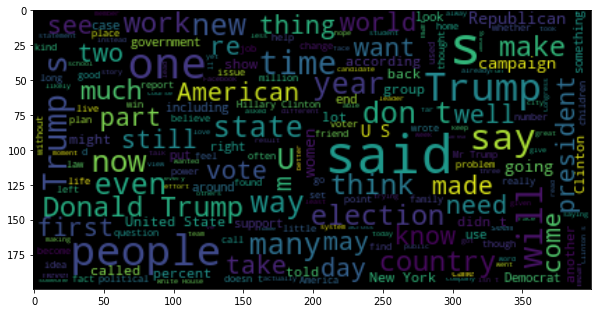

In [ ]:
#creating word clouds
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

#finding character in left list 
leftLists = ""
for char in leftList:
  leftLists += char

#creating the word cloud and showing for left list
wc = WordCloud(max_font_size = 40).generate(leftLists)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")

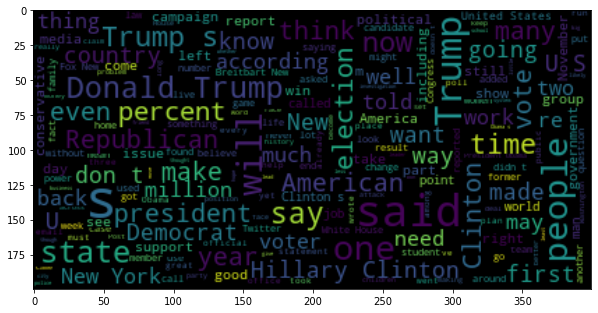

In [ ]:
#same order and analysis for right list 
rightLists = ""
for char in rightList:
  rightLists += char

wc = WordCloud(max_font_size = 40).generate(rightLists)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")

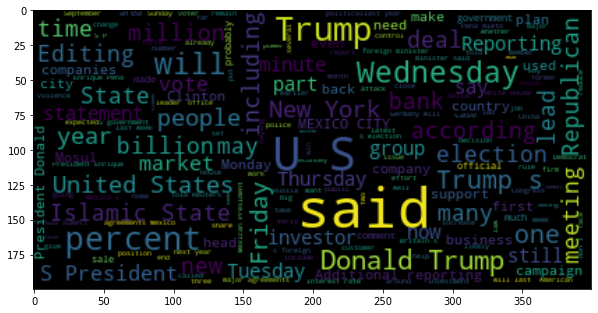

In [ ]:
#same order and analysis for lists with neutral 
mixedLists = ""
for char in mixedList:
  mixedLists += char

wc = WordCloud(max_font_size = 40).generate(mixedLists)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")

In [ ]:
#sentiment analysis analyxer import 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

In [ ]:
#creating lists to run sentiment analysis 
left_pos = []
left_neg = []
left_neu = []

right_pos = []
right_neg = []
right_neu = []

mixed_pos = []
mixed_neg = []
mixed_neu = []

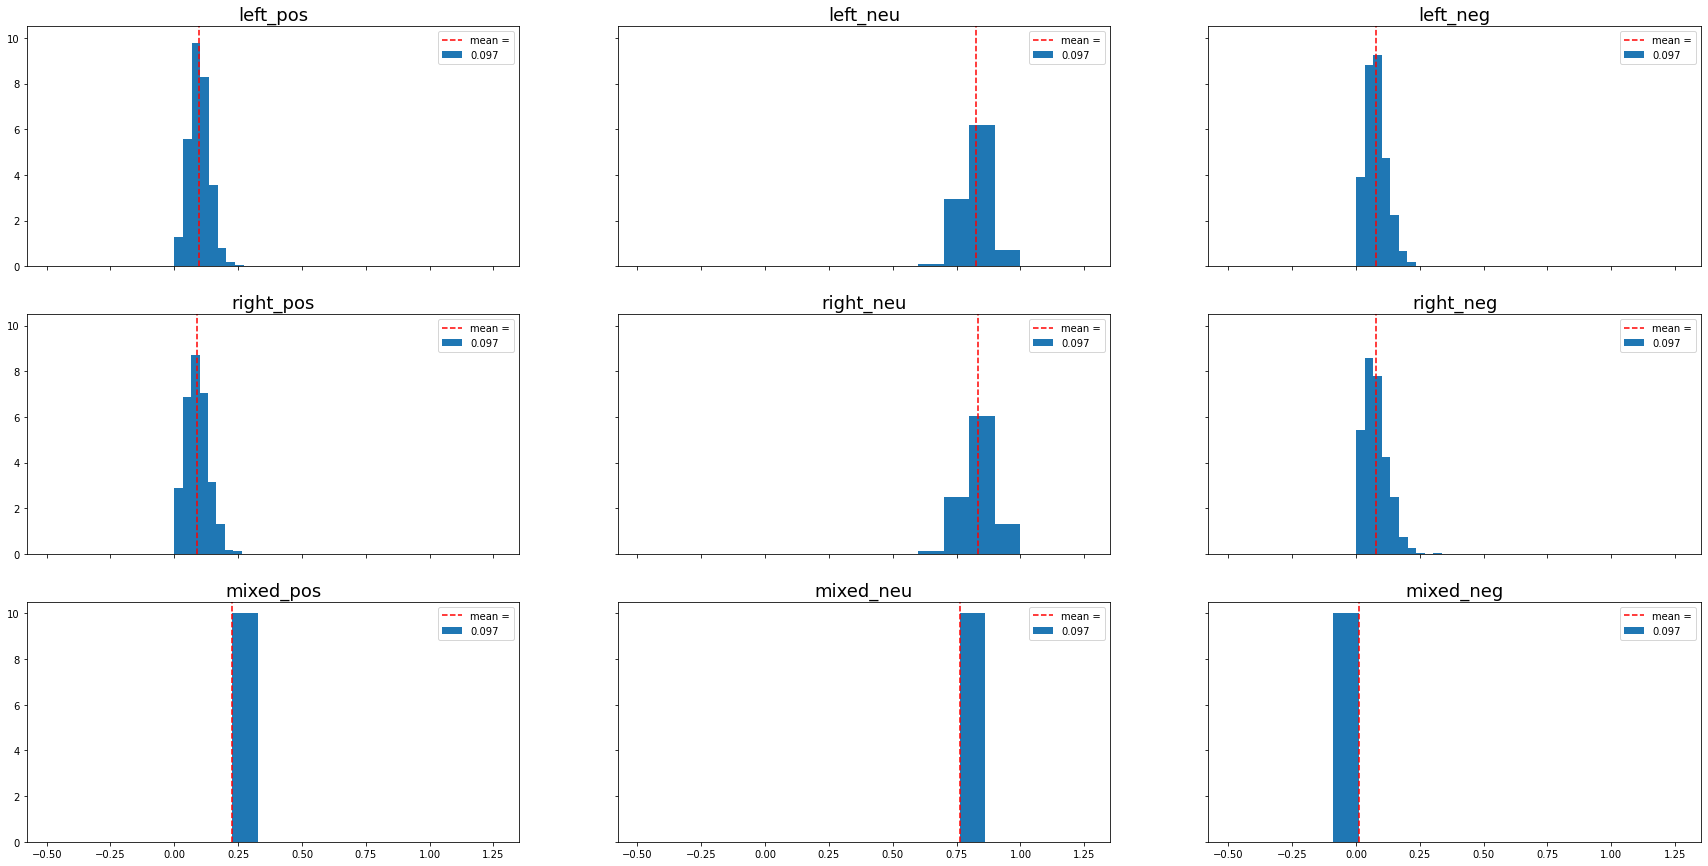

In [ ]:
#sentiment analysis on all left leaning articles 
for left in leftList:
  result = SIA.polarity_scores(left)
  left_pos.append(result["pos"])
  left_neg.append(result["neg"])
  left_neu.append(result["neu"])

#creating orderly graphs for left leaning sentiment analysis 
fig, ax = plt.subplots(3, 3, sharey = True, sharex = True)
ax[0][0].hist(left_pos, density = True)
ax[0][0].set_title("left_pos", fontsize = 18)
ax[0][0].axvline(np.mean(left_pos), ls = "--", c="red")
value = str(round(np.mean(left_pos), 3))
ax[0][0].legend(['mean =', value])

ax[0][1].hist(left_neu, density = True)
ax[0][1].set_title("left_neu", fontsize = 18)
ax[0][1].axvline(np.mean(left_neu), ls = "--", c="red")
value1 = str(round(np.mean(left_pos), 3))
ax[0][1].legend(['mean =', value1])

ax[0][2].hist(left_neg, density = True)
ax[0][2].set_title("left_neg", fontsize = 18)
ax[0][2].axvline(np.mean(left_neg), ls = "--", c="red")
value2 = str(round(np.mean(left_pos), 3))
ax[0][2].legend(['mean =', value1])

#sentiment analysis on all right leaning articles 
for right in rightList:
  result = SIA.polarity_scores(right)
  right_pos.append(result["pos"])
  right_neg.append(result["neg"])
  right_neu.append(result["neu"])

#creating orderly graphs for right leaning sentiment analysis 
ax[1][0].hist(right_pos, density = True)
ax[1][0].set_title("right_pos", fontsize = 18)
ax[1][0].axvline(np.mean(right_pos), ls = "--", c="red")
value3 = str(round(np.mean(left_pos), 3))
ax[1][0].legend(['mean =', value3])

ax[1][1].hist(right_neu, density = True)
ax[1][1].set_title("right_neu", fontsize = 18)
ax[1][1].axvline(np.mean(right_neu), ls = "--", c="red")
value4 = str(round(np.mean(left_pos), 3))
ax[1][1].legend(['mean =', value4])

ax[1][2].hist(right_neg, density = True)
ax[1][2].set_title("right_neg", fontsize = 18)
ax[1][2].axvline(np.mean(right_neg), ls = "--", c="red")
value5 = str(round(np.mean(left_pos), 3))
ax[1][2].legend(['mean =', value5])

#sentiment analysis on all neutral articles 
for mixed in mixedList:
  result = SIA.polarity_scores(right)
  mixed_pos.append(result["pos"])
  mixed_neg.append(result["neg"])
  mixed_neu.append(result["neu"])

#creating orderly graphs for neutral articles 
ax[2][0].hist(mixed_pos, density = True)
ax[2][0].set_title("mixed_pos", fontsize = 18)
ax[2][0].axvline(np.mean(mixed_pos), ls = "--", c="red")
value6 = str(round(np.mean(left_pos), 3))
ax[2][0].legend(['mean =', value6])

ax[2][1].hist(mixed_neu, density = True)
ax[2][1].set_title("mixed_neu", fontsize = 18)
ax[2][1].axvline(np.mean(mixed_neu), ls = "--", c="red")
value7 = str(round(np.mean(left_pos), 3))
ax[2][1].legend(['mean =', value7])

ax[2][2].hist(mixed_neg, density = True)
ax[2][2].set_title("mixed_neg", fontsize = 18)
ax[2][2].axvline(np.mean(mixed_neg), ls = "--", c="red")
value8 = str(round(np.mean(left_pos), 3))
ax[2][2].legend(['mean =', value8])

#showing the graphs 
plt.gcf().set_size_inches(30,15)
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
#creating lists, and getting percentage for data analysis 
negative_words = left_neg + right_neg + mixed_neg
neutral_words =  left_neu + right_neu + mixed_neu
positive_words =  left_pos + right_pos + mixed_pos
all_words = negative_words + neutral_words + positive_words

In [ ]:
percent = len(negative_words)/len(all_words)
print(percent)

0.3333333333333333
